# Data Analysis and Machine Learning Model on Breast Cancer Survival Rates

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('breast_cancer_survival.csv',encoding = 'unicode_escape')

## Data Pre-Processing

In [4]:
df.shape

(334, 15)

In [5]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [7]:
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [9]:
pd.isnull(df).sum().sum()

30

In [33]:
df.dropna(inplace  = True)

In [34]:
pd.isnull(df).sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [35]:
df.shape

(317, 15)

In [36]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


## Data Visualisation

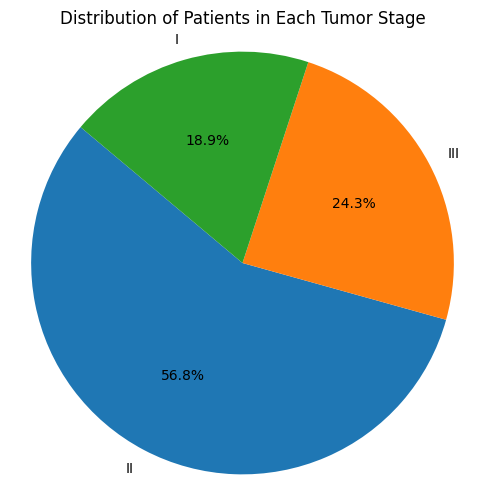

In [37]:
tumor_stage_counts = df['Tumour_Stage'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(tumor_stage_counts, labels=tumor_stage_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Patients in Each Tumor Stage')
plt.show()

In [38]:
tumor_stage_counts

Tumour_Stage
II     180
III     77
I       60
Name: count, dtype: int64

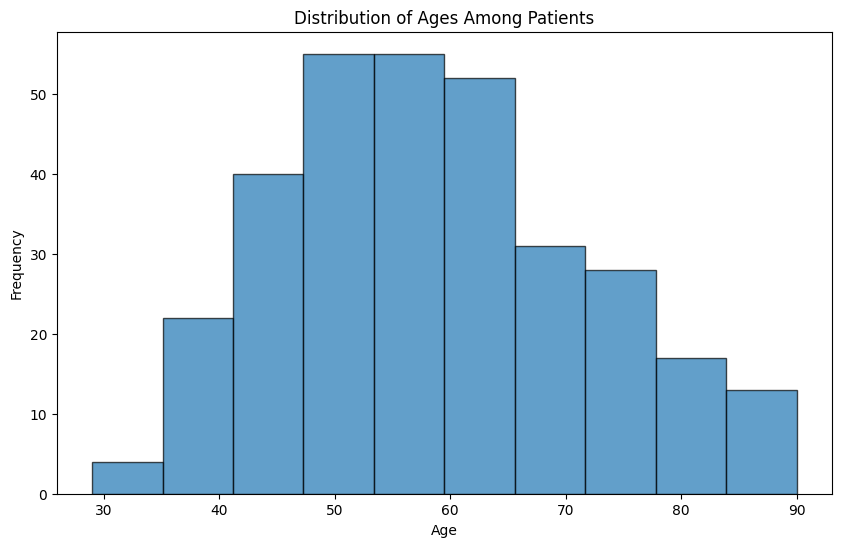

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages Among Patients')
plt.show()

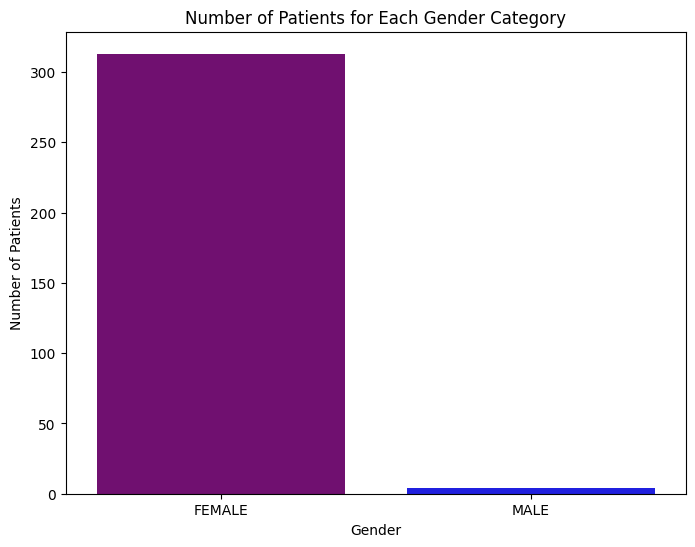

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette=['purple','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Number of Patients for Each Gender Category')
plt.show()

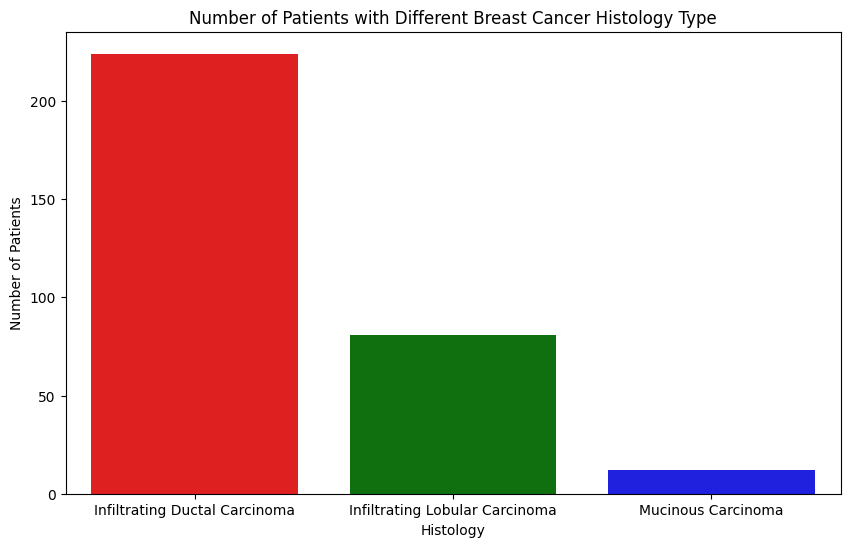

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Histology', palette=['red','green','blue'])
plt.xlabel('Histology')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with Different Breast Cancer Histology Type')
plt.show()

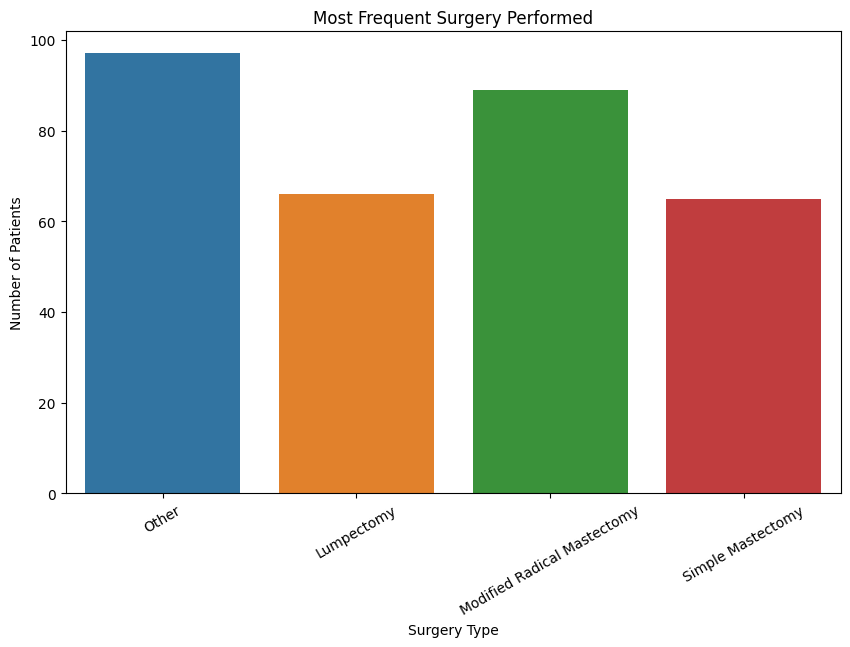

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Surgery_type')
plt.xlabel('Surgery Type')
plt.ylabel('Number of Patients')
plt.title('Most Frequent Surgery Performed')
plt.xticks(rotation=30)
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x600 with 0 Axes>

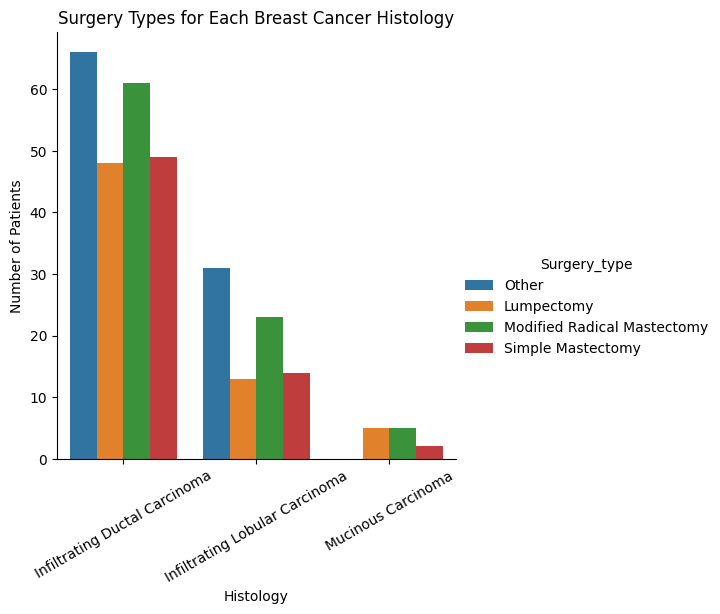

In [43]:
plt.figure(figsize=(20, 6))
sns.catplot(data=df, x='Histology', hue='Surgery_type', kind='count')
plt.xlabel('Histology')
plt.ylabel('Number of Patients')
plt.title('Surgery Types for Each Breast Cancer Histology')
plt.xticks(rotation=30)
plt.show()

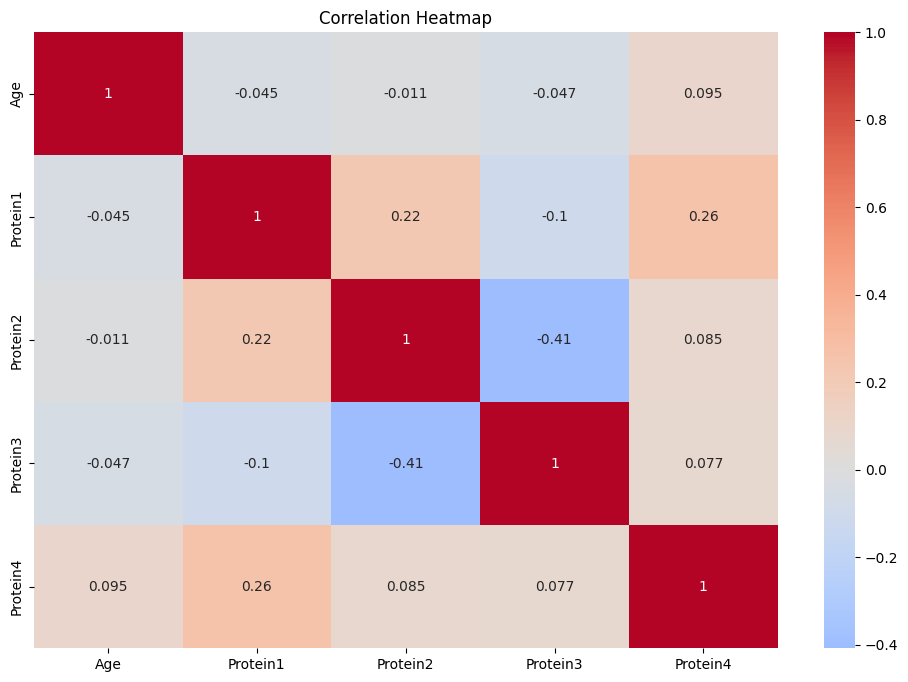

In [44]:
selected_columns = df[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]
corr_matrix = selected_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Conclusions:
* Females have a much higher chance of Breast Cancer than their Male counterparts.
* All the Protein Levels starkly decrease as the Age increases thus making one more vulnerable to Breast Cancer
* Most people discover their tumour at Stage 2, and then Stage 3.
* Infiltrating Ductal Carcinoma is the most affecting Breast Cancer Histology type.
* Other and Modified Radical Mastectomy are the most Popular surgical methods too counter all Breast Cancer Histology Types

In [45]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [46]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [47]:
df = df.rename(columns={'Patient_Status': 'Target'})
df['Target'] = df['Target'].replace({'Alive': 1, 'Dead': 0})

In [48]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Target
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,1
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,0
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,1
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,1
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,1
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,1
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,0
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,1


## Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [50]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Target
0,42,0,0.952560,2.15000,0.007972,-0.048340,1,0,0,0,0,2,20-May-18,26-Aug-18,1
1,54,0,0.000000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2,26-Apr-18,25-Jan-19,0
2,63,0,-0.523030,1.76400,-0.370190,0.010815,1,0,0,0,0,0,24-Aug-18,08-Apr-20,1
3,78,0,-0.876180,0.12943,-0.370380,0.132190,0,0,0,0,0,2,16-Nov-18,28-Jul-20,1
4,42,0,0.226110,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,12-Dec-18,05-Jan-19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0,0.024598,1.40050,0.024751,0.280320,1,0,0,0,1,0,15-Jan-19,27-Mar-20,1
330,41,0,0.100120,-0.46547,0.472370,-0.523870,0,0,0,0,1,1,25-Jul-18,23-Apr-19,1
331,54,0,0.753820,1.64250,-0.332850,0.857860,1,0,0,0,0,3,26-Mar-19,11-Oct-19,0
332,74,0,0.972510,1.42680,-0.366570,-0.107820,1,1,0,0,0,0,26-Nov-18,05-Dec-18,1


In [51]:
df['Histology'].value_counts()

Histology
0    224
1     81
2     12
Name: count, dtype: int64

In [52]:
df['Tumour_Stage'].value_counts()

Tumour_Stage
1    180
2     77
0     60
Name: count, dtype: int64

In [53]:
df['Gender'].value_counts()

Gender
0    313
1      4
Name: count, dtype: int64

In [54]:
df['Surgery_type'].value_counts()

Surgery_type
2    97
1    89
0    66
3    65
Name: count, dtype: int64

In [55]:
df['HER2 status'].value_counts()

HER2 status
0    288
1     29
Name: count, dtype: int64

In [56]:
df.drop(['Date_of_Surgery','Date_of_Last_Visit'],axis = 1,inplace = True)
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Target
0,42,0,0.952560,2.15000,0.007972,-0.048340,1,0,0,0,0,2,1
1,54,0,0.000000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2,0
2,63,0,-0.523030,1.76400,-0.370190,0.010815,1,0,0,0,0,0,1
3,78,0,-0.876180,0.12943,-0.370380,0.132190,0,0,0,0,0,2,1
4,42,0,0.226110,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0,0.024598,1.40050,0.024751,0.280320,1,0,0,0,1,0,1
330,41,0,0.100120,-0.46547,0.472370,-0.523870,0,0,0,0,1,1,1
331,54,0,0.753820,1.64250,-0.332850,0.857860,1,0,0,0,0,3,0
332,74,0,0.972510,1.42680,-0.366570,-0.107820,1,1,0,0,0,0,1


## Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df, test_size = 0.25,random_state = 42)
print(f"Rows in train_set: {len(train_set)} \nRows in test_set: {len(test_set)}")

Rows in train_set: 237 
Rows in test_set: 80


In [58]:
train_set

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Target
160,50,0,-0.062153,1.61200,-0.474040,-0.044448,1,1,0,0,0,3,1
62,66,0,0.495890,1.86610,0.044083,0.242410,1,0,0,0,0,0,1
118,74,0,-0.265580,1.26950,0.380830,-0.007217,1,1,0,0,0,1,1
6,66,0,-0.724860,-0.28289,0.959430,0.350900,1,0,0,0,0,0,1
203,87,0,0.708760,2.17310,-0.439670,-0.392550,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,53,0,0.287080,3.40220,-0.328500,0.216190,2,1,0,0,0,0,1
74,69,0,-0.489030,2.37840,-0.467090,0.097310,0,0,0,0,0,2,1
110,39,0,-0.203470,1.09770,-0.046476,-0.045144,1,1,0,0,0,3,1
285,41,0,0.142520,1.08270,0.210920,0.974280,0,1,0,0,0,3,1


In [59]:
test_set

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Target
76,60,0,0.252870,2.29670,0.532440,0.046291,2,0,0,0,1,0,1
295,47,0,-0.190060,1.97790,-0.007615,0.035325,1,0,0,0,0,1,0
27,68,0,-0.416130,0.75843,0.439920,0.201870,1,1,0,0,0,0,0
269,42,0,-0.175610,0.28963,1.129000,-0.382240,0,0,0,0,0,3,1
10,51,0,-0.384660,0.80609,-1.627400,-0.512910,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,79,0,-0.482690,-0.31677,0.471580,0.347440,1,0,0,0,1,0,1
313,51,0,0.090487,-0.63873,2.193400,-0.838430,1,0,0,0,0,1,1
150,45,0,-0.278070,1.42910,-0.578950,0.222640,1,0,0,0,0,1,0
246,49,0,-1.251700,2.67390,-0.535800,-1.107100,2,0,0,0,0,2,1


In [60]:
X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1:]
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1:]

In [61]:
X_train

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
160,50,0,-0.062153,1.61200,-0.474040,-0.044448,1,1,0,0,0,3
62,66,0,0.495890,1.86610,0.044083,0.242410,1,0,0,0,0,0
118,74,0,-0.265580,1.26950,0.380830,-0.007217,1,1,0,0,0,1
6,66,0,-0.724860,-0.28289,0.959430,0.350900,1,0,0,0,0,0
203,87,0,0.708760,2.17310,-0.439670,-0.392550,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
194,53,0,0.287080,3.40220,-0.328500,0.216190,2,1,0,0,0,0
74,69,0,-0.489030,2.37840,-0.467090,0.097310,0,0,0,0,0,2
110,39,0,-0.203470,1.09770,-0.046476,-0.045144,1,1,0,0,0,3
285,41,0,0.142520,1.08270,0.210920,0.974280,0,1,0,0,0,3


In [62]:
X_test

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
76,60,0,0.252870,2.29670,0.532440,0.046291,2,0,0,0,1,0
295,47,0,-0.190060,1.97790,-0.007615,0.035325,1,0,0,0,0,1
27,68,0,-0.416130,0.75843,0.439920,0.201870,1,1,0,0,0,0
269,42,0,-0.175610,0.28963,1.129000,-0.382240,0,0,0,0,0,3
10,51,0,-0.384660,0.80609,-1.627400,-0.512910,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
270,79,0,-0.482690,-0.31677,0.471580,0.347440,1,0,0,0,1,0
313,51,0,0.090487,-0.63873,2.193400,-0.838430,1,0,0,0,0,1
150,45,0,-0.278070,1.42910,-0.578950,0.222640,1,0,0,0,0,1
246,49,0,-1.251700,2.67390,-0.535800,-1.107100,2,0,0,0,0,2


In [63]:
y_train

,Target
160,1
62,1
118,1
6,1
203,0
...,...
194,1
74,1
110,1
285,1


In [64]:
y_test

,Target
76,1
295,0
27,0
269,1
10,1
...,...
270,1
313,1
150,0
246,1


## Training and Testing The Model

In [72]:
from sklearn.linear_model import LogisticRegression
y_train = np.ravel(y_train)
classifier = LogisticRegression(random_state = 0, max_iter = 1000)
classifier.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

In [70]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.79      1.00      0.88        63

    accuracy                           0.79        80
   macro avg       0.39      0.50      0.44        80
weighted avg       0.62      0.79      0.69        80



C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

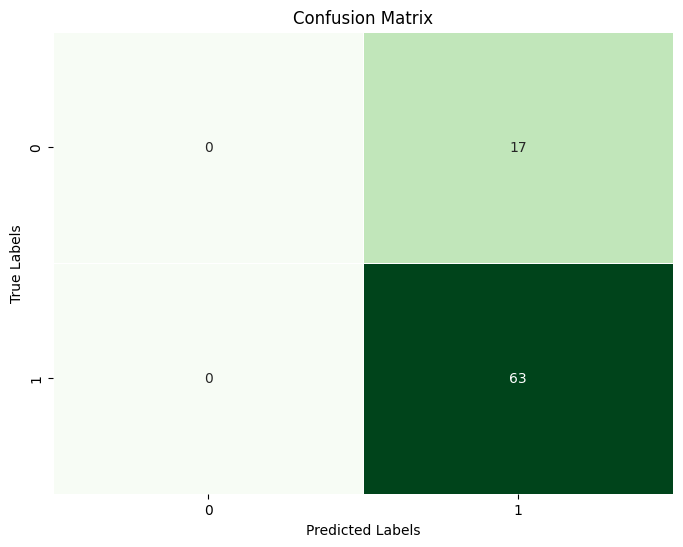

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", linewidths=0.5, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [74]:
cm

array([[ 0, 17],
       [ 0, 63]], dtype=int64)